In [2]:
%reload_ext autoreload
%autoreload 2

## Import packages

In [3]:
import sys

sys.path.append(r"D:\github\ripple_heterogeneity\python")
import functions, loading, add_new_deep_sup, pairwise_ccg_deep_sup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
import glob
import os
import pickle
import seaborn as sns
import nelpy as nel
import random


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


## default plotting

In [4]:
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

fig_save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\figures\panels'

functions.set_plotting_defaults()

## get list of sessions to run

In [6]:
df = pd.read_csv(r"Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv")

not_to_use = (df["basepath"].str.contains("OMLproject", case=False)) | (
    df["basepath"].str.contains("ORproject", case=False)
)
df = df.loc[~not_to_use]

save_path = r"Z:\home\ryanh\projects\ripple_heterogeneity\pairwise_ccg_deep_sup"
pairwise_ccg_deep_sup.run(df,save_path,parallel=True)

In [20]:
ccgs, ccg_id_df = pairwise_ccg_deep_sup.load_data(save_path)


In [26]:
ccg_id_df

,ref,target,UID_ref,UID_target,deepSuperficial_ref,deepSuperficial_target,basepath,rho,pval,layer_label
0,0,1,1,2,Deep,Superficial,Z:\Data\AYAold\AB1\day1,0.062189,1.433435e-02,cross_layer
1,0,2,1,9,Deep,middle,Z:\Data\AYAold\AB1\day1,0.017444,4.925527e-01,unknown
2,0,3,1,10,Deep,Superficial,Z:\Data\AYAold\AB1\day1,0.010344,6.840674e-01,cross_layer
3,0,4,1,12,Deep,middle,Z:\Data\AYAold\AB1\day1,-0.018566,4.651349e-01,unknown
4,0,5,1,15,Deep,Superficial,Z:\Data\AYAold\AB1\day1,-0.043278,8.851246e-02,cross_layer
...,...,...,...,...,...,...,...,...,...,...
142666,17,19,31,35,Deep,Deep,Z:\Data\Kenji\nlx_070329,0.033682,2.174392e-03,same_layer
142667,17,20,31,41,Deep,middle,Z:\Data\Kenji\nlx_070329,0.062825,1.055813e-08,unknown
142668,18,19,32,35,Deep,Deep,Z:\Data\Kenji\nlx_070329,0.028350,9.886361e-03,same_layer
142669,18,20,32,41,Deep,middle,Z:\Data\Kenji\nlx_070329,0.038582,4.456095e-04,unknown


In [24]:
ccg_id_df['layer_label'] = 'unknown'

idx = (ccg_id_df.deepSuperficial_ref == 'Deep') & (ccg_id_df.deepSuperficial_target == 'Deep')
ccg_id_df.loc[idx,'layer_label'] = 'same_layer'
idx = (ccg_id_df.deepSuperficial_ref == 'Superficial') & (ccg_id_df.deepSuperficial_target == 'Superficial')
ccg_id_df.loc[idx,'layer_label'] = 'same_layer'

idx = (ccg_id_df.deepSuperficial_ref == 'Deep') & (ccg_id_df.deepSuperficial_target == 'Superficial')
ccg_id_df.loc[idx,'layer_label'] = 'cross_layer'
idx = (ccg_id_df.deepSuperficial_ref == 'Superficial') & (ccg_id_df.deepSuperficial_target == 'Deep')
ccg_id_df.loc[idx,'layer_label'] = 'cross_layer'

In [49]:
functions.set_size('thesis', fraction=1.5, subplots=(1, 4))

(8.858267953507681, 1.3686776691804303)

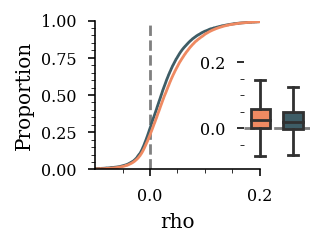

In [57]:
import custom_plots

group_colors = {"same_layer": '#ef8a62',
            'cross_layer': '#3e5d66'}
sns.set_palette(sns.color_palette(group_colors.values()))


fig = plt.figure(figsize=functions.set_size('thesis', fraction=.25, subplots=(1.5, 1)), edgecolor='k')
axs = plt.gca()

box_ax = custom_plots.plot_ecdf_box(
    data=ccg_id_df,
    x="rho",
    hue="layer_label",
    hue_order=group_colors.keys(),
    x_offset=0.7,
    y_offset=0.04,
    showfliers=False,
    ax=axs,
    fig=fig)
axs.set_xlim(-0.1, .2)
box_ax.set_ylim(-0.1, .2)
axs.axvline(0, color='grey', linestyle='--',zorder=-100)
box_ax.axhline(0, color='grey', linestyle='--',zorder=-100)

plt.savefig(os.path.join(fig_save_path,'pairwise_ripple_corr_deep_sup.svg'),dpi=300,bbox_inches='tight')


In [ ]:
from scipy.stats import zscore

ccgs_z = zscore(ccgs, axis=0)


## plot results

<AxesSubplot:>

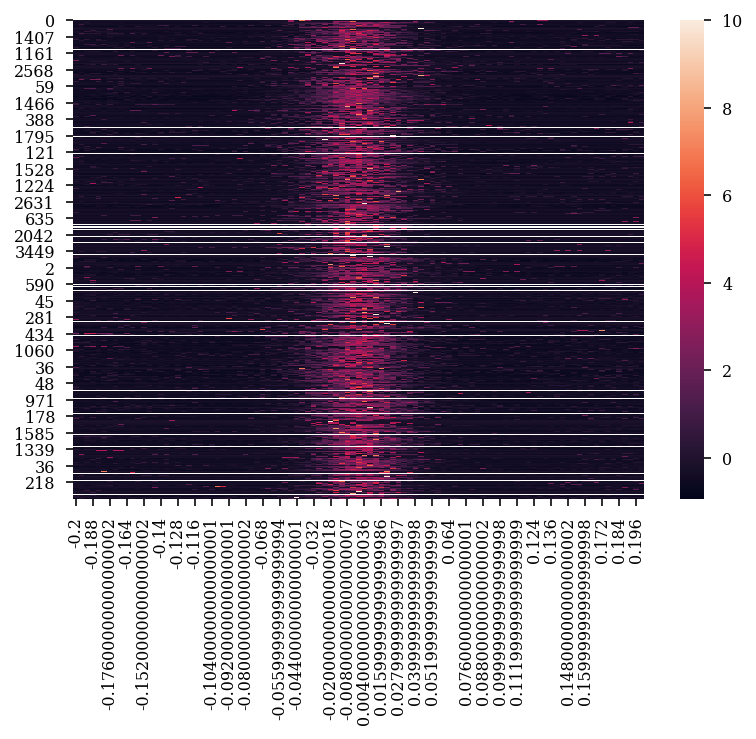

In [ ]:
sns.heatmap(ccgs_z.T)


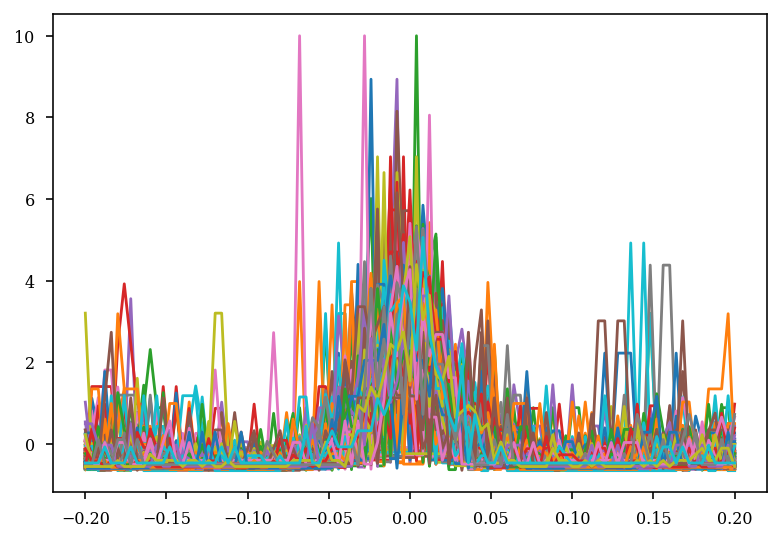

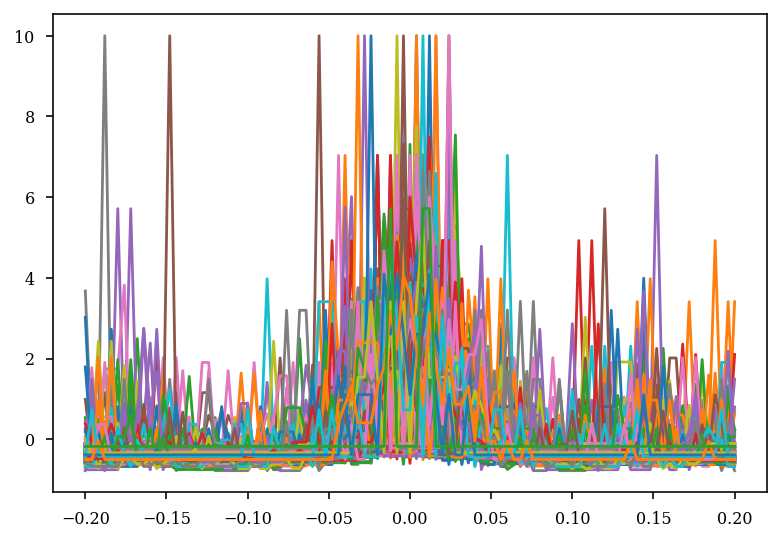

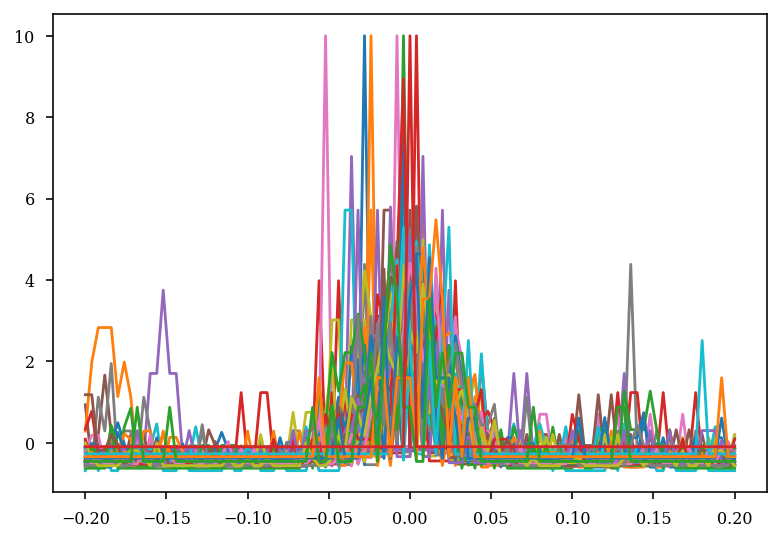

In [ ]:
idx = np.where(
    (temp_df.deepSuperficial_ref == "Deep") & (temp_df.deepSuperficial_target == "Deep")
)[0]
plt.plot(ccg[idx])
plt.show()

idx = np.where(
    (temp_df.deepSuperficial_ref == "Superficial")
    & (temp_df.deepSuperficial_target == "Superficial")
)[0]
plt.plot(ccg[idx])
plt.show()

idx = np.where(
    (temp_df.deepSuperficial_ref == "Deep")
    & (temp_df.deepSuperficial_target == "Superficial")
)[0]
plt.plot(ccg[idx])
plt.show()


<AxesSubplot:>

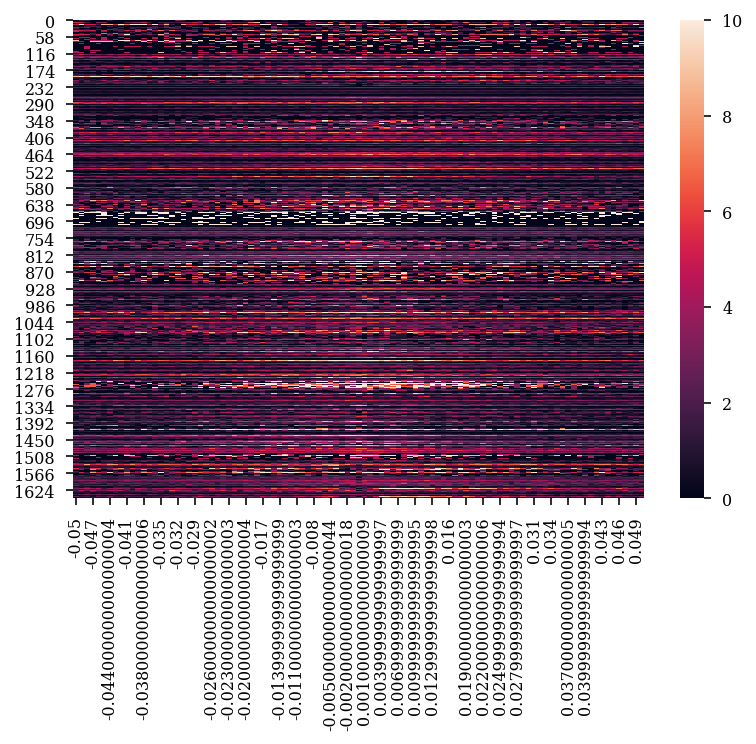

In [ ]:
sns.heatmap(ccg.T, vmax=10)
